#  Word Cloud

This script creates a "word cloud" from an input text. It processes the text, removes punctuation, ignores case and words that do not contain all alphabets, counts the frequencies, and ignores uninteresting or irrelevant words.  
A dictionary with words and their frequencies is the output of the calculate_frequencies function. The wordcloud module will then generate the image from the dictionary.

For the input text this script needs a file that contains text only (.txt).

In [6]:
# Here are all the installs and imports needed for the word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing C:\Users\DELL\anaconda3\lib\site-packages\fileupload\static -> fileupload
Up to date: C:\Users\DELL\AppData\Roaming\jupyter\nbextensions\fileupload\extension.js
Up to date: C:\Users\DELL\AppData\Roaming\jupyter\nbextensions\fileupload\widget.js
Up to date: C:\Users\DELL\AppData\Roaming\jupyter\nbextensions\fileupload\fileupload\widget.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: ok


In [7]:
# The uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `Belarus.txt` (61.70 kB)


In [8]:
def calculate_frequencies(file_contents):
    
    # List of punctuations and uninteresting words 
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just", \
    "during", "since", "after", "in", "also", "other", "for", "on"]
    
    # Remove punctuation
    for letter in file_contents:
        if letter in punctuations:
            file_contents.replace(letter, '')
            
    # Creating words dictionary
    words_map = {}
    words_list = file_contents.split()
    
    for word in words_list:
        # Upper case word should be equlal to the same lower case word
        word = word.lower()
        # Choose relevant words and add them to the dictionary
        if word.isalpha() and not word in uninteresting_words:
            if word in words_map:
                words_map[word] = words_map[word] + 1
            else:
                words_map[word] = 1

    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(words_map)
    return cloud.to_array()

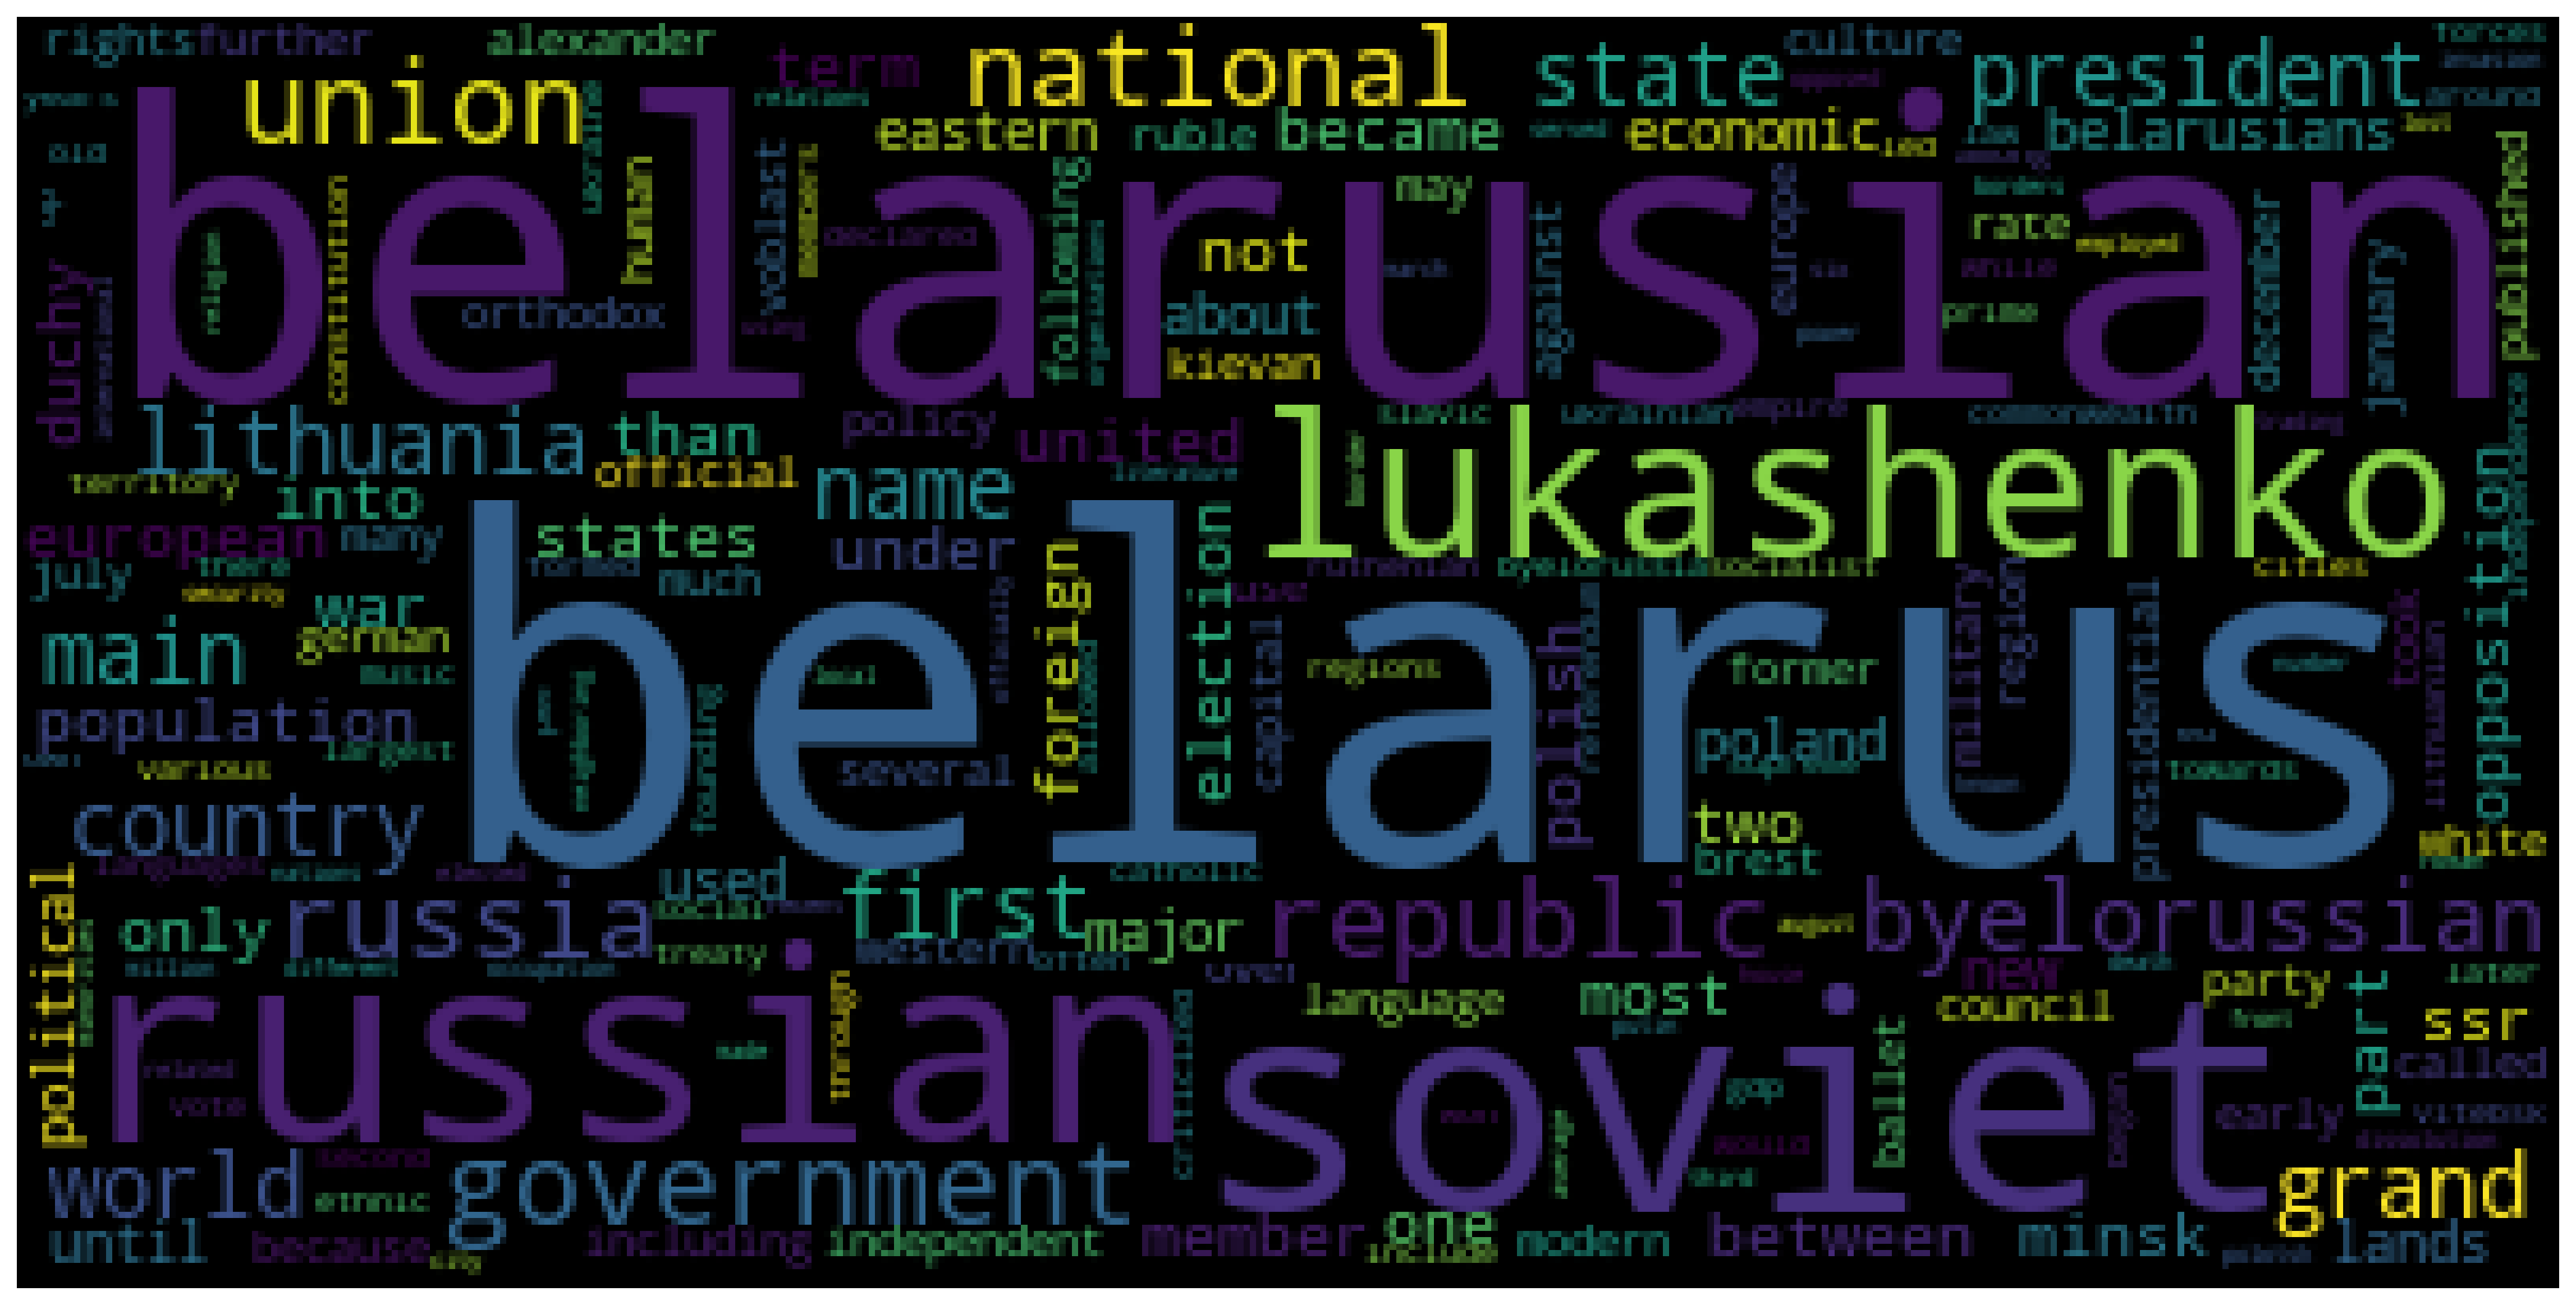

In [9]:
# Display a wordcloud image

word_image = calculate_frequencies(file_contents)
plt.figure(figsize=(20,10), dpi=300)
plt.imshow(word_image, interpolation = 'nearest')
plt.axis('off')
plt.show()